In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
%matplotlib inline
pd.set_option('display.max_columns', None)

In [127]:
# Specify the path to the zipped file and the CSV file within it
zip_file_path = 'archive (1).zip'
csv_file_name = 'yourfile.csv'  
# Read the CSV directly from the zip file
df = pd.read_csv(zip_file_path, compression='zip')

In [128]:
df.shape

(2443651, 9)

In [129]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [133]:
# General Selection
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [135]:
# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] # how does loc work Vs iloc
cat = pd.concat([cat, cat_from_num], axis=1)
num = num.drop(columns=cat_from_num.columns)

## Part 1: Understanding Product Categories

#### Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

- Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

- Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [136]:
pd.crosstab(index=cat['category'],
            columns='count')

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [96]:
frequency_table = cat['category'].value_counts()
frequency_table = frequency_table.reset_index()
top5 = frequency_table.reset_index().head(5)

In [97]:
top5

,level_0,index,category
0,0,Sports & Outdoors,836265
1,1,Beauty,19312
2,2,"Handmade Clothing, Shoes & Accessories",19229
3,3,Bath & Body,19092
4,4,Birthday Gifts,18978


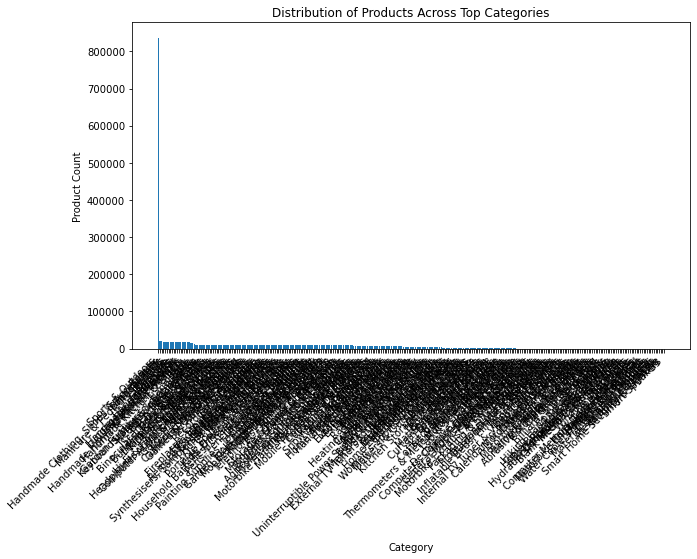

In [98]:
# Bar Chart: Distribution of Products across Top Categories
plt.figure(figsize=(10, 6))
plt.bar(frequency_table['index'], frequency_table['category'])
plt.title('Distribution of Products Across Top Categories')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=45, ha='right')
plt.show()

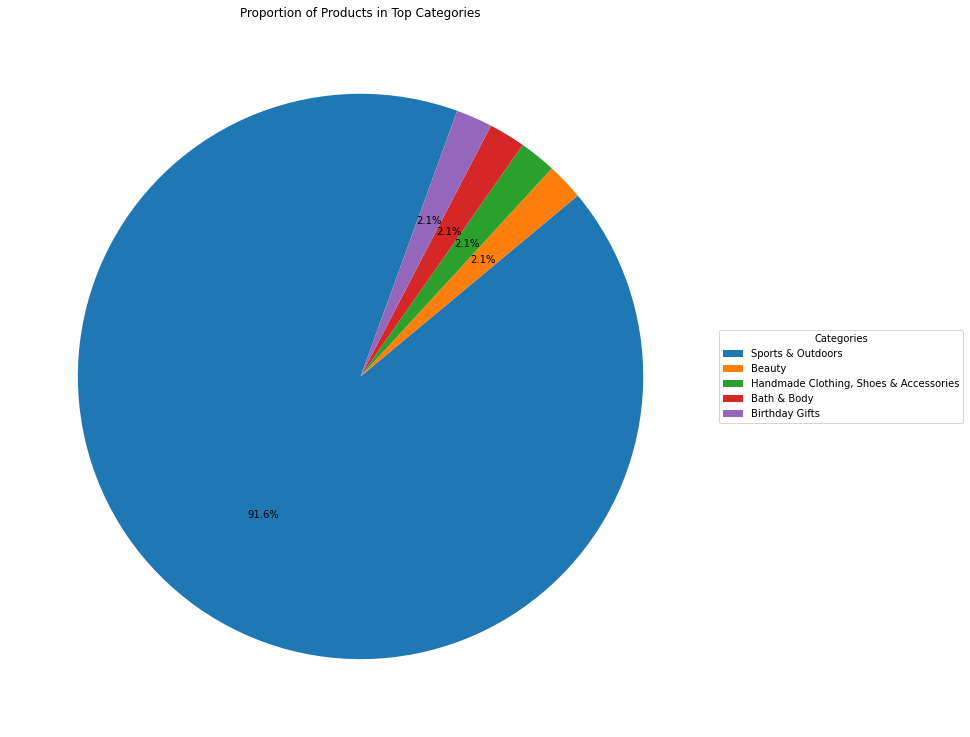

In [117]:
# Pie Chart: Proportions of Products in Top Categories
plt.figure(figsize=(13, 13))
plt.pie(top5['category'], autopct='%1.1f%%', startangle=70)
plt.title('Proportion of Products in Top Categories')
plt.legend(top5['index'], title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()

# Part 2: Delving into Product Pricing

#### Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

- Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

- Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [140]:
round(df['price'].describe(), 2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [154]:
mean = round(df['price'].mean(), 2)
median = round(df['price'].median(), 2)
mode = round(df['price'].mode()[0], 2)

print('Mean:',mean)
print('Median:',median)
print('Mode:',mode)

Mean: 89.24
Median: 19.09
Mode: 9.99


In [162]:
variance = round(df['price'].var(), 2)
std = round(df['price'].std(), 2)
range_price = round(df['price'].max() - df['price'].min() , 2)
quatile_25 = round(df['price'].quantile(0.25), 2)
quatile_75 = round(df['price'].quantile(0.75), 2)
interquartile = quatile_75 - quatile_25

print('Variance:',variance)
print('Standard deviation:',std)
print('Range:',range_price)
print('Interquartile:',interquartile)

Variance: 119445.49
Standard deviation: 345.61
Range: 100000.0
Interquartile: 36.0


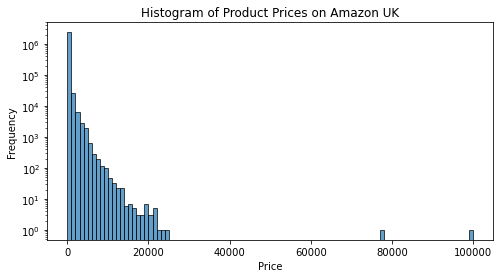

In [212]:
plt.figure(figsize=(8, 4))
plt.hist(df['price'], bins= 100, edgecolor='black',alpha=0.7 )
plt.title('Histogram of Product Prices on Amazon UK')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')  
plt.show()

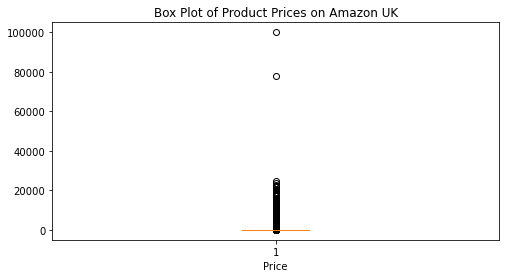

In [196]:
plt.figure(figsize=(8, 4))
plt.boxplot(data=df, x='price')
plt.title('Box Plot of Product Prices on Amazon UK')
plt.xlabel('Price')
plt.show()

# Part 3: Unpacking Product Ratings
### Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

- Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

- Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

- Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

- Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [197]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [208]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [209]:
mean = round(df['stars'].mean(), 1)
median = round(df['stars'].median(), 1)
mode = round(df['stars'].mode()[0], 1)

print('Mean:',mean)
print('Median:',median)
print('Mode:',mode)

Mean: 2.2
Median: 0.0
Mode: 0.0


In [210]:
variance = round(df['stars'].var(), 2)
std = round(df['stars'].std(), 2)
range_price = round(df['stars'].max() - df['price'].min() , 2)
quatile_25 = round(df['stars'].quantile(0.25), 2)
quatile_75 = round(df['stars'].quantile(0.75), 2)
interquartile = quatile_75 - quatile_25

print('Variance:',variance)
print('Standard deviation:',std)
print('Range:',range_price)
print('Interquartile:',interquartile)

Variance: 4.82
Standard deviation: 2.19
Range: 5.0
Interquartile: 4.4


In [213]:
df['stars'].isna().sum()

0

In [216]:
skewness = round(skew(df['stars']), 2)
kurt = round(kurtosis(df['stars']), 2)

In [217]:
skewness

0.08

In [218]:
kurt

-1.93

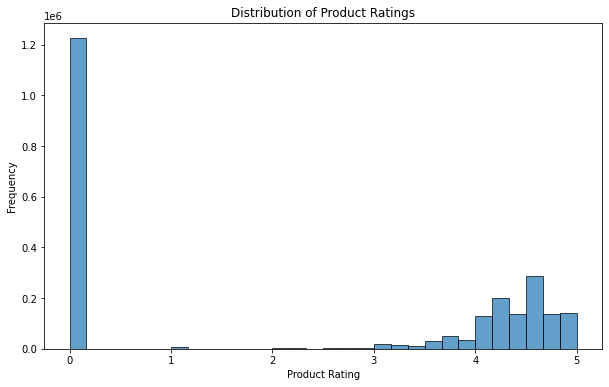

In [219]:
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")
plt.show()